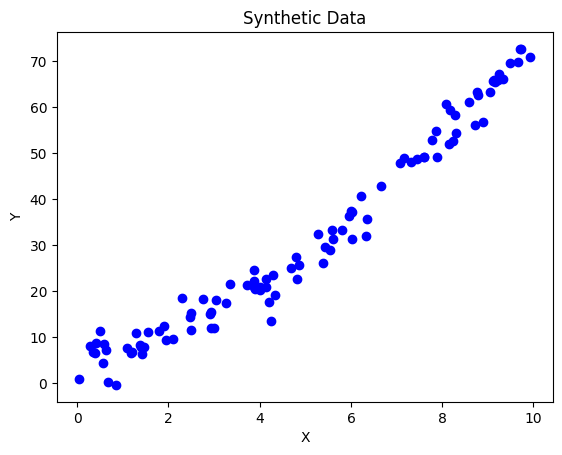

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# variabel independen x: 100 nilai acak antara 1 dan 10
x = np.random.rand(100, 1) * 10
y = 0.5 * x**2 + 2 * x + 5 + np.random.randn(100, 1) * 3

plt.scatter(x, y, color='blue')
plt.title("Synthetic Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

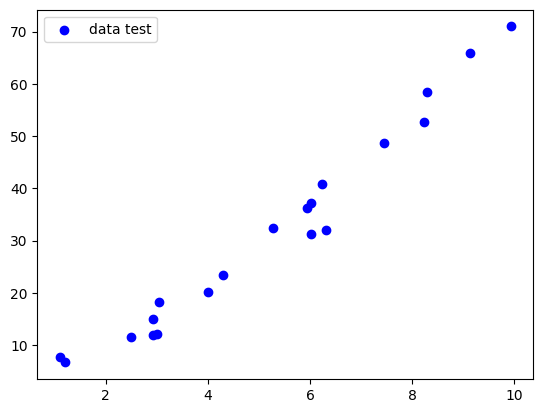

In [ ]:

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

plt.scatter(x_test, y_test, color='blue', label='data test')
plt.legend()
plt.show()



Linear Regression

Definisi: Linear Regression merupakan model/metode regresi yang tujuannya untuk mencari hubungan linear (garis lurus) antara variabel independen dan variabel dependen


$$
\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \dots + \beta_n X_n
$$

Hasil MSE: 18.98294519004083


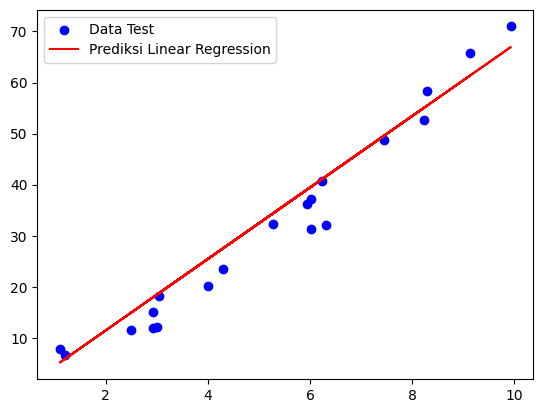

In [ ]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)
y_pred = linear_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Hasil MSE:", mse)

plt.scatter(x_test, y_test, color='blue', label='Data Test')
plt.plot(x_test, y_pred, color='red', label='Prediksi Linear Regression')
plt.legend()
plt.show()

ridge regression

Definisi: salah satu bagian dari linear regression dengan menambahkan penalti L2 regularization, agar dapat membantu mengurangi overfitting

$$
L(\beta) = \sum_{i=1}^{m} (y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^{n} (\beta_j)^2
$$

Loss function jumlah kesalahan kuadrat + Lambda penalti (L2 Regularization)

Hasil MSE: 18.992283066144218


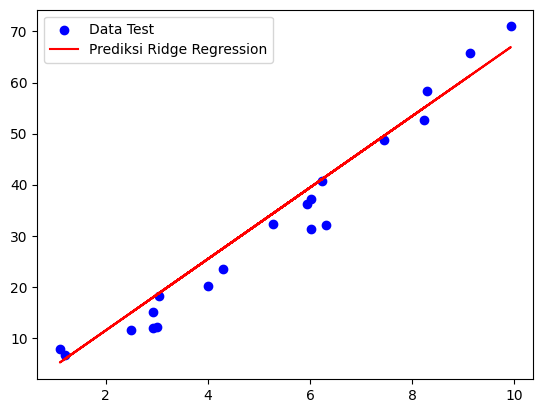

In [ ]:

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

ridge_model = Ridge(alpha=0.25) #perbedaan Alfa
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Hasil MSE: {mse}')

plt.scatter(x_test, y_test, color='blue', label='Data Test')
plt.plot(x_test, y_pred, color='red', label='Prediksi Ridge Regression')
plt.legend()
plt.show()

lasso regresion

Definisi: salah satu bagian dari linear regression dengan menambahkan penalti L1 regularization, agar dapat membantu mengurangi overfitting.

$$
L(\beta) = \sum_{i=1}^{m} (y_i - \hat{y_i})^2 + \lambda \sum_{j=1}^{n} |\beta_j|^2
$$

Hasil MSE: 19.093859379606766


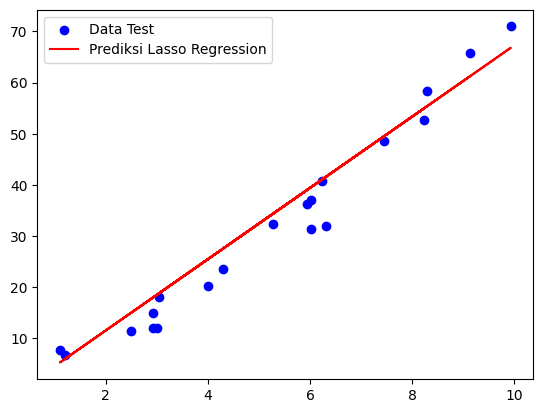

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

lasso_model = Lasso(alpha=0.25)
lasso_model.fit(x_train, y_train)
y_pred = lasso_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Hasil MSE: {mse}')

plt.scatter(x_test, y_test, color='blue', label='Data Test')
plt.plot(x_test, y_pred, color='red', label='Prediksi Lasso Regression')
plt.legend()
plt.show()

polynomial regression

$$
\hat{y} = \beta_0 + \beta_1 X + \beta_2 X^2 + \dots + \beta_n X^n
$$

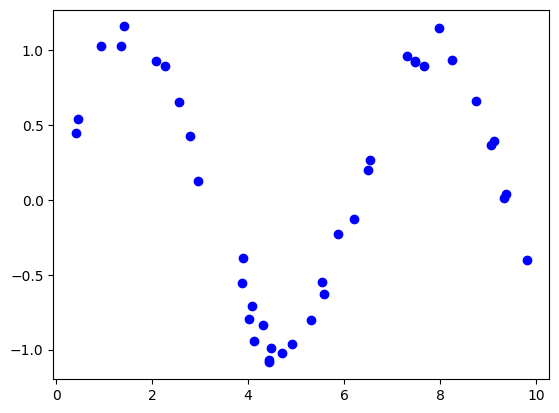

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

x = np.sort(np.random.rand(40) * 10).reshape(-1, 1)
y = np.sin(x).ravel() + np.random.randn(40) * 0.1

plt.scatter(x, y, color='blue')
plt.show()

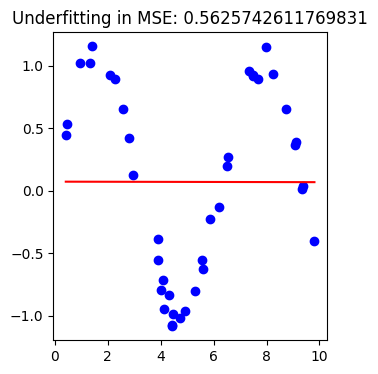

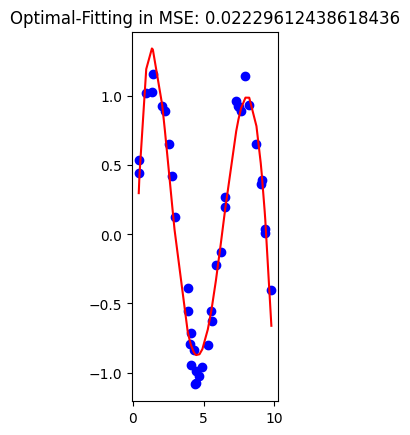

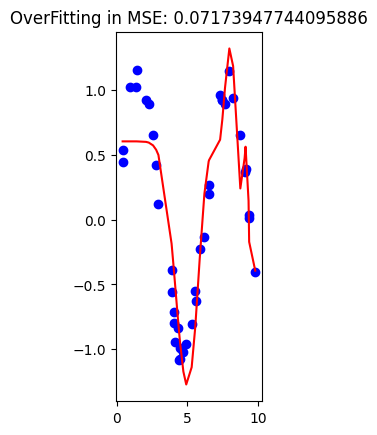

In [ ]:

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred = linear_model.predict(x)
mse = mean_squared_error(y, y_pred)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title(f'Underfitting in MSE: {mse}')
plt.show()

#optimal fitting

plt.subplot(1, 3, 2)
optimal_model = make_pipeline(PolynomialFeatures(degree=5), LinearRegression())
optimal_model.fit(x, y)
y_pred = optimal_model.predict(x)
mse = mean_squared_error(y, y_pred)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title(f'Optimal-Fitting in MSE: {mse}')
plt.show()

#overfitting
plt.subplot(1, 3, 3)
overfit_model = make_pipeline(PolynomialFeatures(degree=20), LinearRegression())
overfit_model.fit(x, y)
y_pred = overfit_model.predict(x)
mse3 = mean_squared_error(y, y_pred)

plt.scatter(x, y, color='blue')
plt.plot(x, y_pred, color='red')
plt.title(f'OverFitting in MSE: {mse3}')
plt.show()